Situation 1: 
A -> utilise un algo de Q-learning epsilon-greedy
B -> est random

In [82]:
v = 100
t = 10
c = 10
m = 1
n = 2
benchmark = c + t 
profit_benchmark = t/2
f0 = 2* profit_benchmark

In [83]:
import random 

prix = [v,c,(v+c)/2]
p_b = random.choice(prix)
epsilon = 0.5



In [84]:


f0 = 2* profit_benchmark
alpha = 0.2  # Taux d'apprentissage

# Initialisation des récompenses de base

rewards = []
# Initialisation de la Q-table pour entreprise A
# Les états et actions sont les prix possibles
q_table = {price: {action: 0 for action in prix} for price in prix}
print(q_table)
p_bs = []
p_as = []
for episode in range(10000):
    # Étape 1 : L'entreprise B choisit un prix aléatoire
    p_b = random.choice(prix)
    p_bs.append(p_b)

    # Étape 2 : L'entreprise A choisit un prix selon epsilon-greedy
    if random.random() < epsilon:  # Exploration
        # Choisir un prix alternatif autre que le meilleur dans la Q-table
        best_action = max(q_table[p_b], key=q_table[p_b].get)
        alternative_actions = [action for action in prix if action != best_action]
        p_a = random.choice(alternative_actions)  # Choix aléatoire parmi les alternatives
        p_as.append(p_a)
    
    else:  # Exploitation
        p_a = max(q_table[p_b], key=q_table[p_b].get)
        p_as.append(p_a)
        

    # Étape 3 : Calcul de i_tild
    i_tild = max(0, min(1, (p_b - p_a + t) / (2 + t)))  # Limité entre 0 et 1

    # Étape 4 : Calcul des profits
    profit_a = max(0, (p_a - c) * i_tild)  # Profit pour A
    
   
    reward = alpha *profit_a + (1-alpha)*f0 
    rewards.append(reward)
    
    f0 = reward
    
    q_table[p_b][p_a] = reward

    # Affichage périodique des résultats
    if episode % 100 == 0:
        print(f"Épisode {episode}: p_a = {p_a}, p_b = {p_b}, profit_a = {profit_a}")

# Résultat final
print("\nQ-table finale :")
for state, actions in q_table.items():
    print(f"État (Prix B = {state}): {actions}")

{100: {100: 0, 10: 0, 55.0: 0}, 10: {100: 0, 10: 0, 55.0: 0}, 55.0: {100: 0, 10: 0, 55.0: 0}}
Épisode 0: p_a = 55.0, p_b = 100, profit_a = 45.0
Épisode 100: p_a = 10, p_b = 100, profit_a = 0
Épisode 200: p_a = 100, p_b = 100, profit_a = 75.0
Épisode 300: p_a = 100, p_b = 10, profit_a = 0
Épisode 400: p_a = 100, p_b = 10, profit_a = 0
Épisode 500: p_a = 55.0, p_b = 100, profit_a = 45.0
Épisode 600: p_a = 100, p_b = 100, profit_a = 75.0
Épisode 700: p_a = 100, p_b = 10, profit_a = 0
Épisode 800: p_a = 55.0, p_b = 10, profit_a = 0
Épisode 900: p_a = 55.0, p_b = 10, profit_a = 0
Épisode 1000: p_a = 55.0, p_b = 100, profit_a = 45.0
Épisode 1100: p_a = 55.0, p_b = 10, profit_a = 0
Épisode 1200: p_a = 55.0, p_b = 10, profit_a = 0
Épisode 1300: p_a = 55.0, p_b = 55.0, profit_a = 37.5
Épisode 1400: p_a = 100, p_b = 10, profit_a = 0
Épisode 1500: p_a = 55.0, p_b = 55.0, profit_a = 37.5
Épisode 1600: p_a = 55.0, p_b = 100, profit_a = 45.0
Épisode 1700: p_a = 55.0, p_b = 55.0, profit_a = 37.5
Épis

In [85]:
q_table

{100: {100: 47.277862454302465,
  10: 22.694583104159204,
  55.0: 46.822289963441975},
 10: {100: 33.172187665717956, 10: 30.1885609915709, 55.0: 26.537750132574367},
 55.0: {100: 12.088437093751706,
  10: 28.41962654932952,
  55.0: 41.465234582147446}}

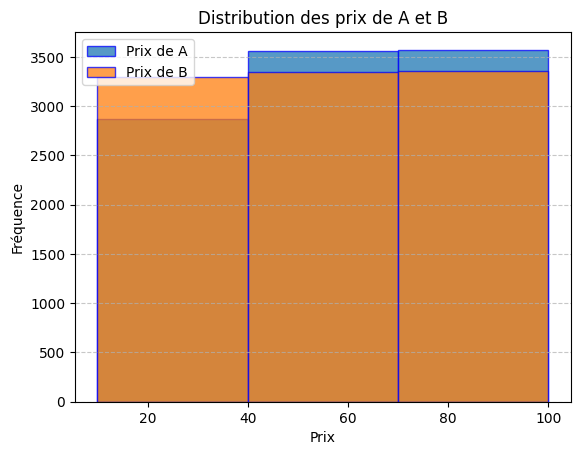

In [86]:
import matplotlib.pyplot as plt

plt.hist(p_as, bins=3, edgecolor='blue', alpha=0.75, label='Prix de A')
plt.hist(p_bs, bins=3, edgecolor='blue', alpha=0.75, label='Prix de B')


# Ajout des légendes et des titres
plt.title("Distribution des prix de A et B")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()  # Ajout de la légende

# Affichage
plt.show()


